In [50]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn as skl
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [3]:
df = pd.read_csv("heart_data.csv")

In [4]:
df.head()

,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [5]:
df.describe()

,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,34999.500000,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,20207.403759,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17499.750000,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,34999.500000,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,52499.250000,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,69999.000000,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
print(df.isna().sum())
#0 valeurs manquantes

index          0
id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64


In [10]:
df['cardio'].value_counts()#nous avons un bon ratio entre les individus sains et malades

cardio
0    35021
1    34979
Name: count, dtype: int64

<Axes: >

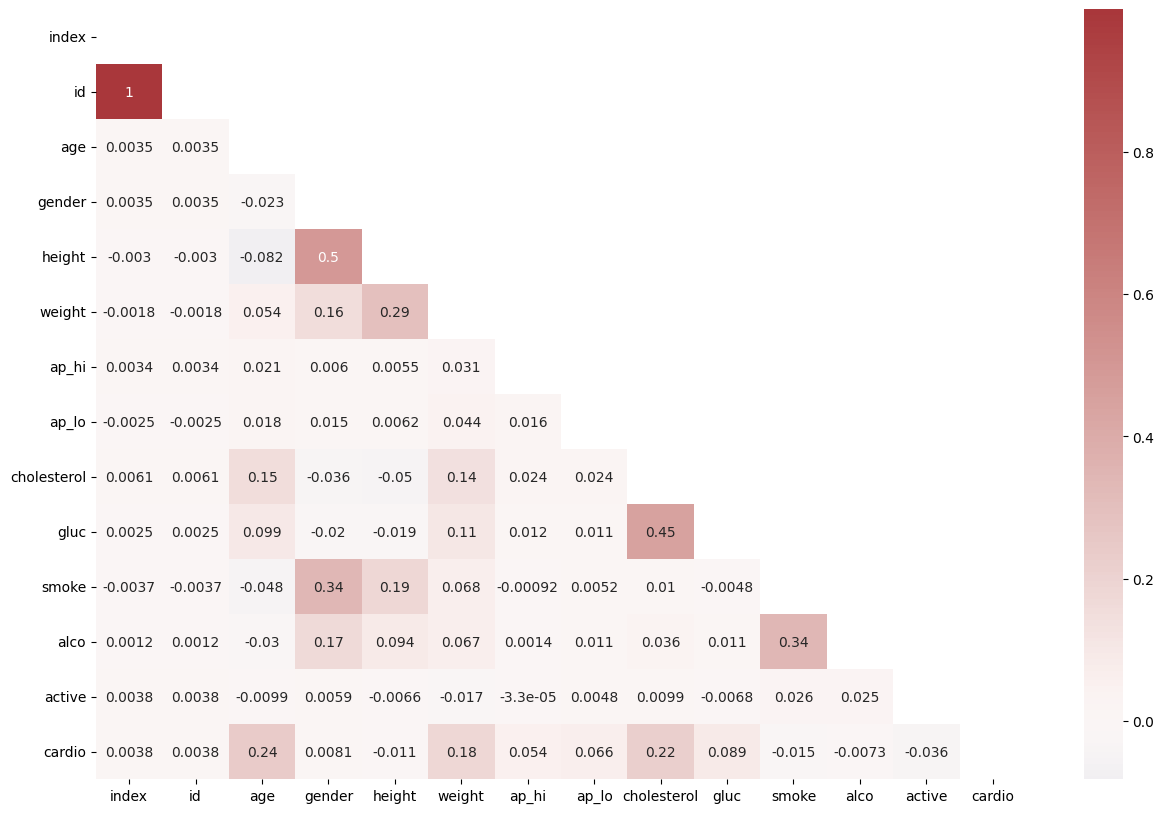

In [39]:
corr = df.corr()
mask = np.triu(corr)
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap="vlag",mask = mask,center = 0)

# en analysant les corrélations on se rend compte que le jeu de donnés ne permet pas une bonne analyse 
#car les corrélation entre feature et target ( cardio) sont très faible
#--------------------------------#
#En effet après l'entrainement du modèle le score plafonneà 72% dans la meilleure des configurations trouvé avec usage de grid search : kernel = linear, C= 0.1

# Je vais donc utiliser un nouveaux dataset

In [42]:
df2 = pd.read_csv('heartDisease.csv')
df2.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


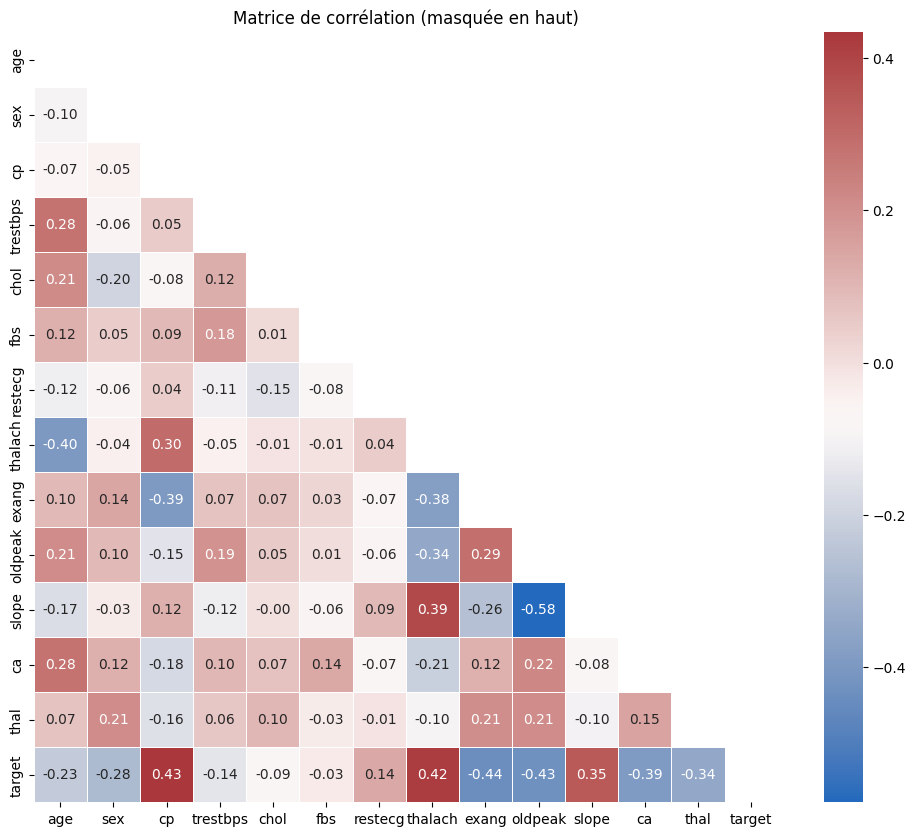

In [40]:
corr = df2.corr() #utilisation d'un 2 eme dataset (from GitHub)

# masque de la moitié supérieure
mask = np.triu(np.ones_like(corr, dtype=bool))

# tracé
plt.figure(figsize=(12,10))
sns.heatmap(corr,mask=mask, fmt=".2f",cmap="vlag",annot=True,linewidths=0.5)
plt.title("Matrice de corrélation (masquée en haut)")
plt.show()
# Il est clair que ce 2 eme data a de bien meilleur corrélation feature/target on peut dnc éspérer un meilleur score ud modèle après entrainement 
#néanmoins ce dataset est bien moins fournis (seulement 300lignes contre les 70000 du df1)

In [46]:
X = df2[["age","sex","cp","trestbps","chol","fbs","restecg",	"thalach",	"exang",	"oldpeak",	"slope",	"ca",	"thal"]]
y = df2['target'] 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train,y_test = train_test_split(X, y,test_size=0.2, random_state=0)

In [69]:
model = svm.SVC(kernel = 'linear',C=0.35)
model.fit(X_train,y_train)
print("Modèle entrainé !")
#print(f"Score: {model.decision_function(X_test)}")
y_pred = model.predict(X_test)
print(f"Score : {accuracy_score(y_test,y_pred)}")
#premier test avec les meme hypermaramètre que le modèle entrainé avec le df1 (kernel = 'linear',C=0.1) ==> score = 83.6% donc bien mieux deja
#avec C=0.3 ==> 85.2%

Modèle entrainé !
Score : 0.8360655737704918


In [72]:
#on va utiliser GridSearchCV pour trouver les meilleurs hypermaraètre
#mais avant cela on va réduire la taille de l'échantillon pour accélérer la recherche :
df2_small = df2.sample(frac=0.5, random_state=1)
X_Small = df2_small.drop(columns=['target'])
y_Small = df2_small['target']

X_trainSmall, X_testSmall, y_trainSmall,y_testSmall = train_test_split(X_Small, y_Small,test_size=0.2, random_state=0)

param_grid = {
    'C':     [0.31,0.32,0.33,0.34],
    #'gamma': ['scale', 'auto', 0.01, 0.1],  # exemples de valeurs
    'kernel':['linear']      # tests de noyaux courants
}
print(f"Recherche des meilleurs paramètres avec Grid Search, nombre de features : {len(X_small)}")
grid = GridSearchCV(svm.SVC(), param_grid, cv=3)
grid.fit(X_trainSmall, y_trainSmall)
print("Meilleurs paramètres :", grid.best_params_)
print("Score de test :", grid.score(X_testSmall, y_testSmall))

Recherche des meilleurs paramètres avec Grid Search, nombre de features : 61
Meilleurs paramètres : {'C': 0.31, 'kernel': 'linear'}
Score de test : 0.8064516129032258


In [65]:
y_Small.head()

age          64.0
sex           0.0
cp            0.0
trestbps    180.0
chol        325.0
Name: 110, dtype: float64